# Home Loan Data Analysis
## Problem statement:

For a safe and secure lending experience, it's important to analyze the past data. In this project, you have to build a deep learning model to predict the chance of default for future loans using historical data. As you will see, this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.

## Objective: Create a model that predicts whether or not an applicant will be able to repay a loan using historical data

Domain: Finance

Analysis to be done: Perform data preprocessing and build a deep learning prediction model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import recall_score, accuracy_score, f1_score, classification_report, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay

from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


2025-05-05 08:12:45.108959: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-05 08:12:45.118036: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746450765.127758   25263 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746450765.130828   25263 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746450765.139923   25263 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

### Dataset
[Home Loan Dataset](https://drive.google.com/drive/folders/1kwwdDkY5QYqpS_OwB7DOm1GJ7Mox92nb)

#### Load the dataset that is given to you

In [2]:
loan_file_path = '/home/cullen-fedora/Documents/Fullstack Databases/loan_data.csv'
dict_file_path = '/home/cullen-fedora/Documents/Fullstack Databases/Data_Dictionary.csv'
loan_data = pd.read_csv(loan_file_path)
print(loan_data.info())
loan_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
loan_data['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [4]:
data_dict = pd.read_csv(dict_file_path, encoding='ISO-8859-1')
print(data_dict.info())
data_dict

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Column no.     120 non-null    int64 
 1   Variable Name  120 non-null    object
 2   Description    120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB
None


,Column no.,Variable Name,Description
0,1,SK_ID_CURR,Unique identifier for each client.
1,2,TARGET,"Whether the loan was repaid (1 for yes, 0 for ..."
2,3,NAME_CONTRACT_TYPE,"Type of loan contract (e.g., Cash loans, Revol..."
3,4,CODE_GENDER,Gender of the applicant.
4,5,FLAG_OWN_CAR,Whether the applicant owns a car (Yes/No).
...,...,...,...
115,116,AMT_REQ_CREDIT_BUREAU_DAY,Number of inquiries to the Credit Bureau in th...
116,117,AMT_REQ_CREDIT_BUREAU_WEEK,Number of inquiries to the Credit Bureau in th...
117,118,AMT_REQ_CREDIT_BUREAU_MON,Number of inquiries to the Credit Bureau in th...
118,119,AMT_REQ_CREDIT_BUREAU_QRT,Number of inquiries to the Credit Bureau in th...


#### Observations
- There are 120 columns/features but some of these may not be salient for our predictive model.
- ID column can be dropped immediately
- Target column defines '0' as defaulted and '1' as repaid, however this is likely mislabelled. As a company with this many defaults likely, would not have survived...

### <b>We will be operating as if 0 = repaid and 1 = defaulted<b>

In [5]:
loan_data.drop([
    'SK_ID_CURR',
], axis=1, inplace=True)

### Check for null values in the dataset

In [6]:
null_percent = loan_data.isnull().mean()
null_only = null_percent[null_percent>0]*100
null_only

AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
OWN_CAR_AGE                   65.990810
OCCUPATION_TYPE               31.345545
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 67, dtype: float64

Below are feature with under 40% null values and might be good candidates for imputing with mean or mode values

In [7]:
null_only_under_40 = null_only[null_only<40]
null_only_under_40

AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
OCCUPATION_TYPE               31.345545
CNT_FAM_MEMBERS                0.000650
EXT_SOURCE_2                   0.214626
EXT_SOURCE_3                  19.825307
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
DAYS_LAST_PHONE_CHANGE         0.000325
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

Below are features above 40% null values and may be good candidates to be dropped all together as inputing may skewing results too much

In [8]:
null_only_over_40 = null_only[null_only>40]
null_only_over_40

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

In [9]:
loan_data.drop(null_only_over_40.index, axis=1, inplace=True) # Dropped missing values for features that greater than 40% of their corresponding dataset.

In [10]:
loan_data.shape

(307511, 72)

#### Observations
- Most features over 40% missing values seem to be related to housing-specific information with exceptions of OWN_CAR_AGE and EXT_SOURCE_1
- There are now only 72 features/columns after dropping sparse data columns (Have >40% null/missing values)

In [11]:
num_cols = loan_data.select_dtypes(include=np.number).isnull().sum()
num_cols_null = num_cols[num_cols>0]
num_cols_null

AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
CNT_FAM_MEMBERS                   2
EXT_SOURCE_2                    660
EXT_SOURCE_3                  60965
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
DAYS_LAST_PHONE_CHANGE            1
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64

In [12]:
cat_cols = loan_data.select_dtypes(exclude=np.number).isnull().sum()
cat_cols_null = cat_cols[cat_cols>0]
cat_cols_null

NAME_TYPE_SUITE     1292
OCCUPATION_TYPE    96391
dtype: int64

### Data Manipulation
- We can assume missing values for "AMT_REQ_CREDIT_BUREAU", "CNT_SOCIAL_CIRCLE", and "CNT_FAM_MEMBERS" categories mean the individuals do not have inquiries and can be filled with "0" as domain knowledge suggestion missing may mean absent
- Average missing values for the remaining numerical categories below the 40% threshold
- "AMT_ANNUITY" and "AMT_GOODS_PRICE" are filled with median values to minimize skewing data to outliers
- Likewise, mode missing values can be filled with the most frequent (mode) values for categorical categories

In [13]:
# to be filled with 0s
loan_data_zeros = loan_data[[
    'AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_YEAR',
    'DEF_30_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE', 
    'OBS_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE',
    'CNT_FAM_MEMBERS', 
    'DAYS_LAST_PHONE_CHANGE'
 ]]
zeros_col = loan_data_zeros.columns

In [14]:
# to be filled with avgs
loan_data_avg = loan_data[[
    'EXT_SOURCE_2',
    'EXT_SOURCE_3', 
]]
avg_col = loan_data_avg.columns

In [15]:
loan_data_med = loan_data[[
'AMT_ANNUITY',
'AMT_GOODS_PRICE',
]]
med_col = loan_data_med.columns

In [16]:
loan_data_mode = loan_data[[
'NAME_TYPE_SUITE',
'OCCUPATION_TYPE'
]]
mode_col = loan_data_mode.columns

In [17]:
def filler(df, col_change, filler):
    if filler == 'mean':
        for col in col_change:
            df[col].fillna(df[col].mean(), inplace=True)
    if filler == 'median':
        for col in col_change:
            df[col].fillna(df[col].median(), inplace=True)
    if filler == 'mode':
        for col in col_change:
            df[col].fillna(df[col].mode()[0], inplace=True)
    if filler == 0:
        for col in col_change:
            df[col].fillna(0, inplace=True)
    if filler == 'unknown':
        for col in col_change:
            df[col].fillna('unknown', inplace=True)
filler(loan_data, avg_col, 'mean')
filler(loan_data, med_col, 'median')
filler(loan_data, mode_col, 'mode')
filler(loan_data, zeros_col, 0)

/tmp/ipykernel_25263/2679535266.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipykernel_25263/2679535266.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [18]:
loan_data.isnull().sum().value_counts() # to verify null values have been filled

0    72
Name: count, dtype: int64

### Feature Engineering
Several features can be consolidated or expressed as ratios to reduce total number of 

In [19]:
loan_data['credit_to_income'] = loan_data['AMT_CREDIT']/loan_data['AMT_INCOME_TOTAL'] # Credit:Income ratio
loan_data['annuity_to_income'] = loan_data['AMT_ANNUITY']/loan_data['AMT_INCOME_TOTAL'] # Annuity:Income ratio
loan_data['loan_to_goods'] = loan_data['AMT_CREDIT']/loan_data['AMT_GOODS_PRICE'] # Loan:goods ratio

In [20]:
# Converting days to years and positive values
loan_data['Years_BIRTH'] = -(loan_data['DAYS_BIRTH']/365.25)
loan_data['Years_EMPLOYED'] = -(loan_data['DAYS_EMPLOYED']/365.25)
loan_data['Years_REGISTRATION'] = -(loan_data['DAYS_REGISTRATION']/365.25)
loan_data['Years_ID_PUBLISH']= -(loan_data['DAYS_ID_PUBLISH']/365.25)

In [21]:
loan_data['Default_rate_30days'] = loan_data['DEF_30_CNT_SOCIAL_CIRCLE']/loan_data['OBS_30_CNT_SOCIAL_CIRCLE'] # relating 30-day default rates with social circle observation
loan_data['Default_rate_60days'] = loan_data['DEF_60_CNT_SOCIAL_CIRCLE']/loan_data['OBS_60_CNT_SOCIAL_CIRCLE'] # relating 60-day default rates with social circle observation

In [22]:
loan_data['dependents_per_family'] = loan_data['CNT_CHILDREN']/loan_data['CNT_FAM_MEMBERS']
loan_data['income_per_family'] = loan_data['AMT_INCOME_TOTAL']/loan_data['CNT_FAM_MEMBERS']

In [23]:
loan_data['total_flag_documents'] = loan_data[[col for col in loan_data.columns if col.startswith('FLAG_DOCUMENT_')]].sum(axis=1)

Dropping columns after feature engineering

In [24]:
loan_data.drop([
    'AMT_CREDIT',
    'AMT_INCOME_TOTAL',
    'AMT_ANNUITY',
    'AMT_GOODS_PRICE',
    'DAYS_BIRTH',
    'DAYS_EMPLOYED',
    'DAYS_REGISTRATION',
    'DAYS_ID_PUBLISH',
    'DEF_30_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE',
    'OBS_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE',
    'Default_rate_30days',
    'Default_rate_60days',
    'CNT_CHILDREN',
    'CNT_FAM_MEMBERS',
    'FLAG_DOCUMENT_2',
    'FLAG_DOCUMENT_3',
    'FLAG_DOCUMENT_4',
    'FLAG_DOCUMENT_5',
    'FLAG_DOCUMENT_6',
    'FLAG_DOCUMENT_7',
    'FLAG_DOCUMENT_8',
    'FLAG_DOCUMENT_9',
    'FLAG_DOCUMENT_10',
    'FLAG_DOCUMENT_11',
    'FLAG_DOCUMENT_12',
    'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14',
    'FLAG_DOCUMENT_15',
    'FLAG_DOCUMENT_16',
    'FLAG_DOCUMENT_17',
    'FLAG_DOCUMENT_18',
    'FLAG_DOCUMENT_19',
    'FLAG_DOCUMENT_20',
    'FLAG_DOCUMENT_21',
    'FLAG_MOBIL',
    'FLAG_EMP_PHONE',
    'FLAG_WORK_PHONE',
    'FLAG_CONT_MOBILE',
    'FLAG_PHONE',
    'FLAG_EMAIL',
    'NAME_TYPE_SUITE',
    'REG_REGION_NOT_LIVE_REGION',
    'LIVE_REGION_NOT_WORK_REGION',
    'REG_CITY_NOT_LIVE_CITY',
    'LIVE_CITY_NOT_WORK_CITY',
    'WEEKDAY_APPR_PROCESS_START',
    'HOUR_APPR_PROCESS_START',
], axis=1, inplace=True)

In [25]:
loan_data.isnull().sum()

TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
OCCUPATION_TYPE                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
REG_REGION_NOT_WORK_REGION     0
REG_CITY_NOT_WORK_CITY         0
ORGANIZATION_TYPE              0
EXT_SOURCE_2                   0
EXT_SOURCE_3                   0
DAYS_LAST_PHONE_CHANGE         0
AMT_REQ_CREDIT_BUREAU_HOUR     0
AMT_REQ_CREDIT_BUREAU_DAY      0
AMT_REQ_CREDIT_BUREAU_WEEK     0
AMT_REQ_CREDIT_BUREAU_MON      0
AMT_REQ_CREDIT_BUREAU_QRT      0
AMT_REQ_CREDIT_BUREAU_YEAR     0
credit_to_income               0
annuity_to_income              0
loan_to_goods                  0
Years_BIRTH                    0
Years_EMPLOYED                 0
Years_REGI

In [26]:
# fill 0 to null/inf values as a result from dividing by 0 in feature engineering
loan_data.replace([float('inf'), float('-inf')], 0, inplace=True)
loan_data.fillna(0, inplace=True)

In [27]:
loan_data.shape

(307511, 35)

#### Observations
- Features have now been condensed to 35 from feature engineering

### Encode the columns that are required for the model

In [28]:
cat_cols = loan_data.select_dtypes(exclude=np.number)
num_cols = loan_data.select_dtypes(include=np.number)

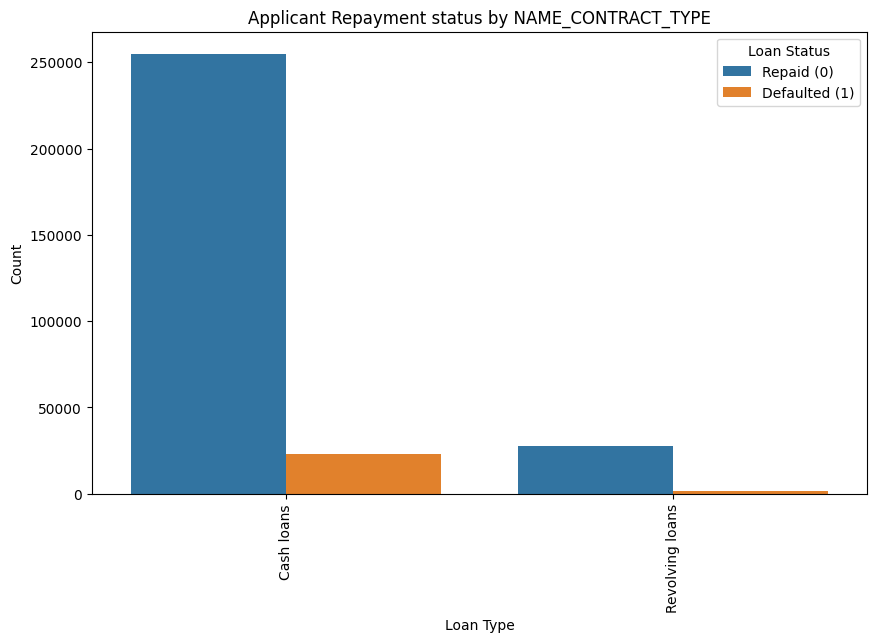

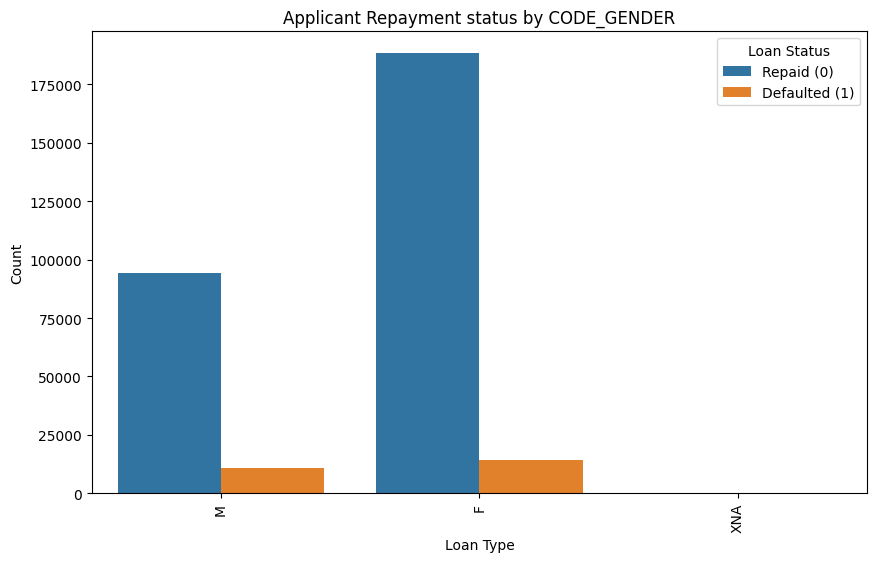

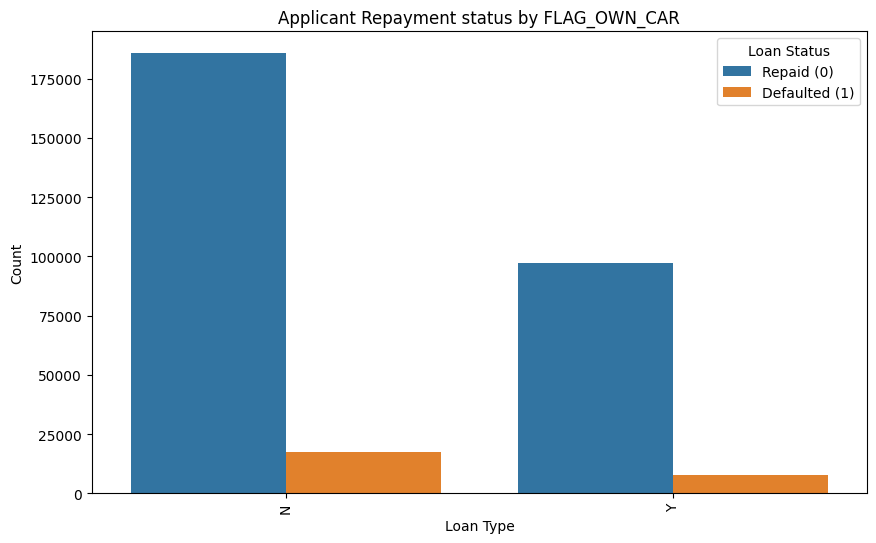

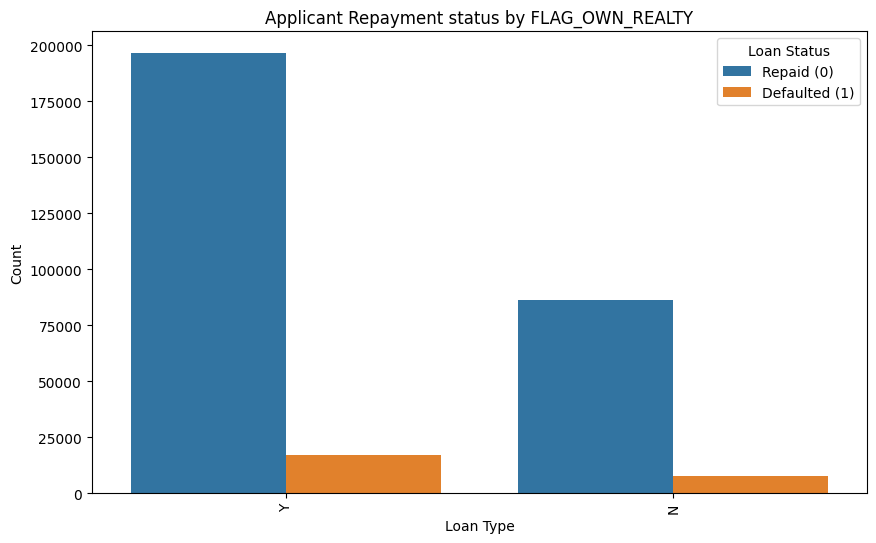

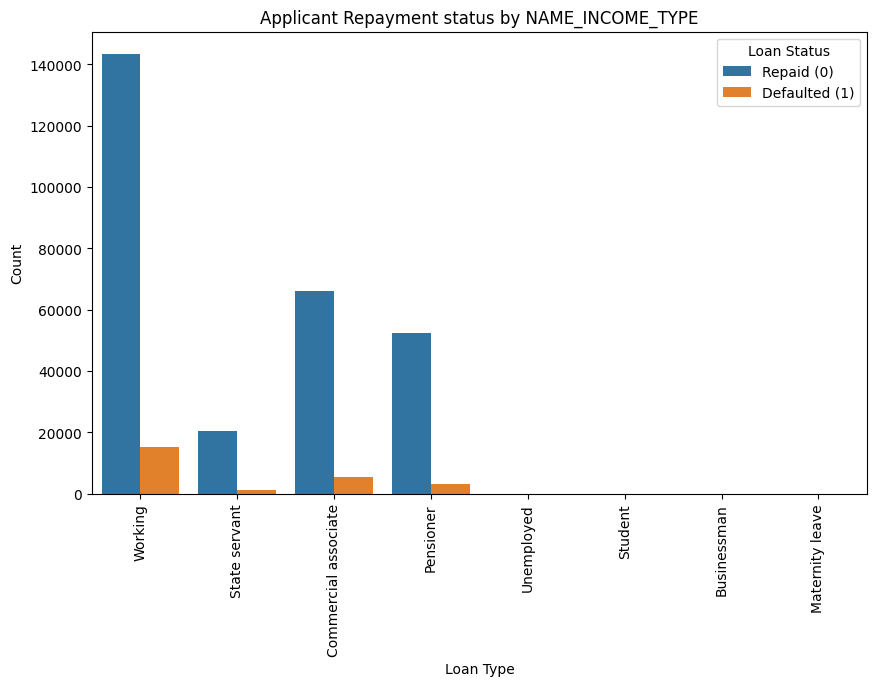

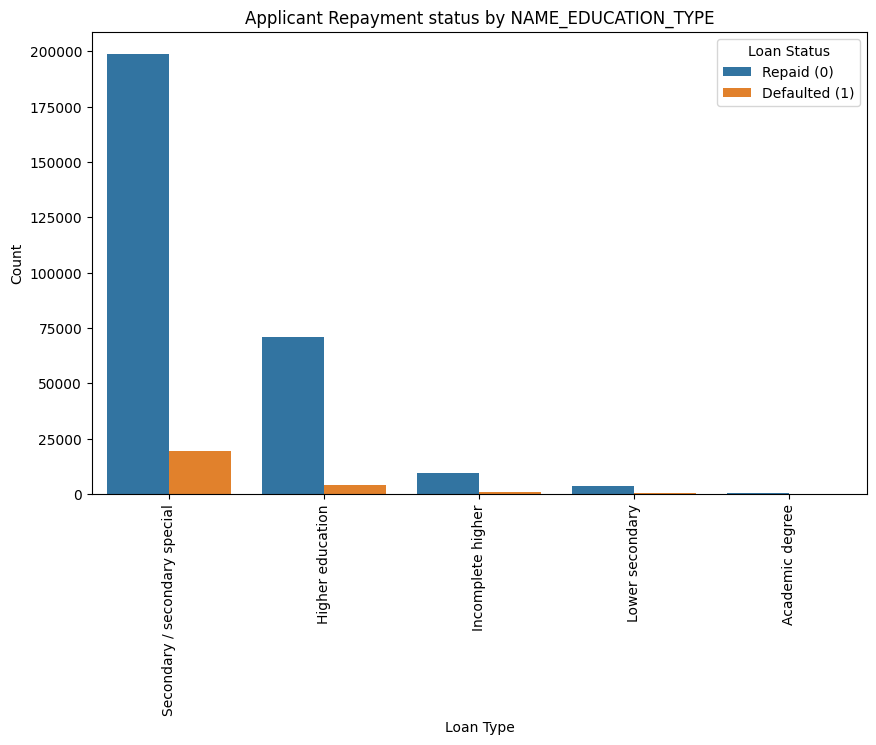

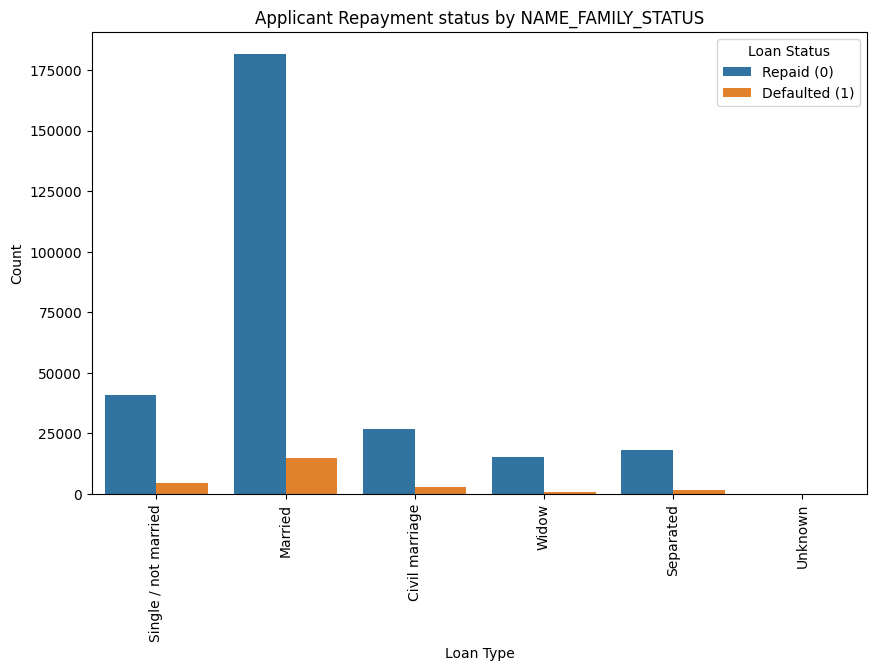

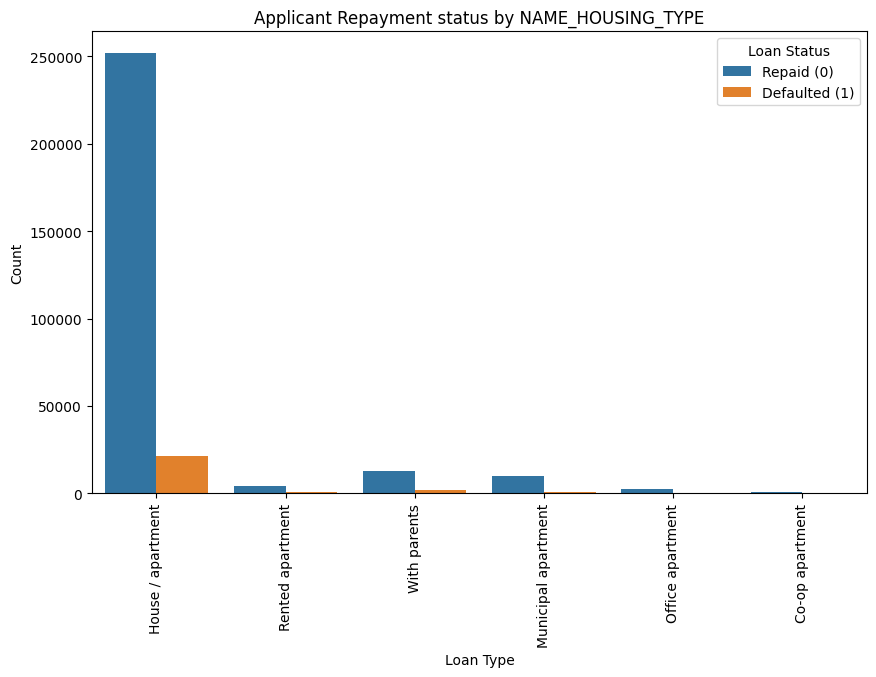

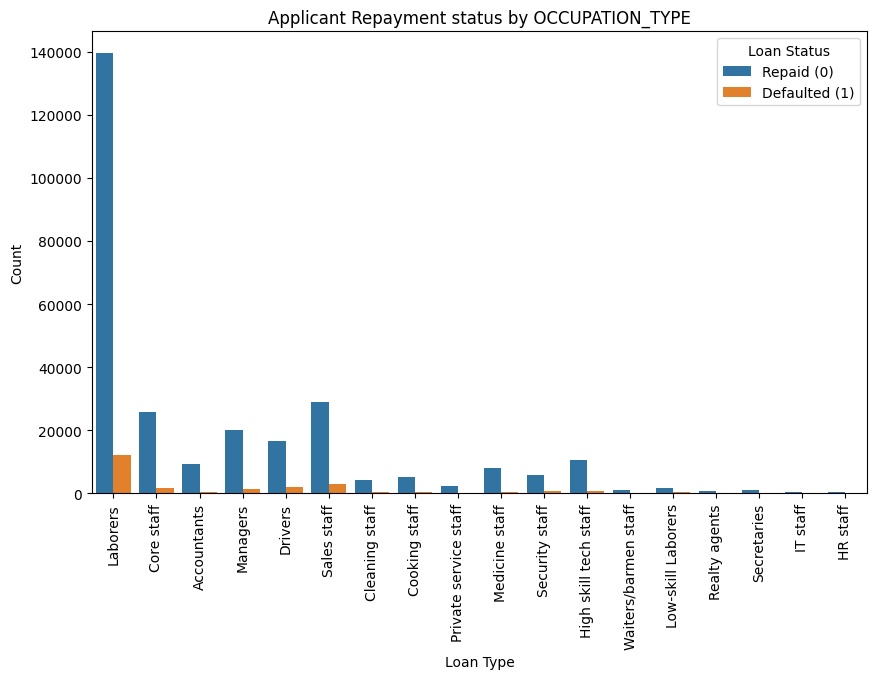

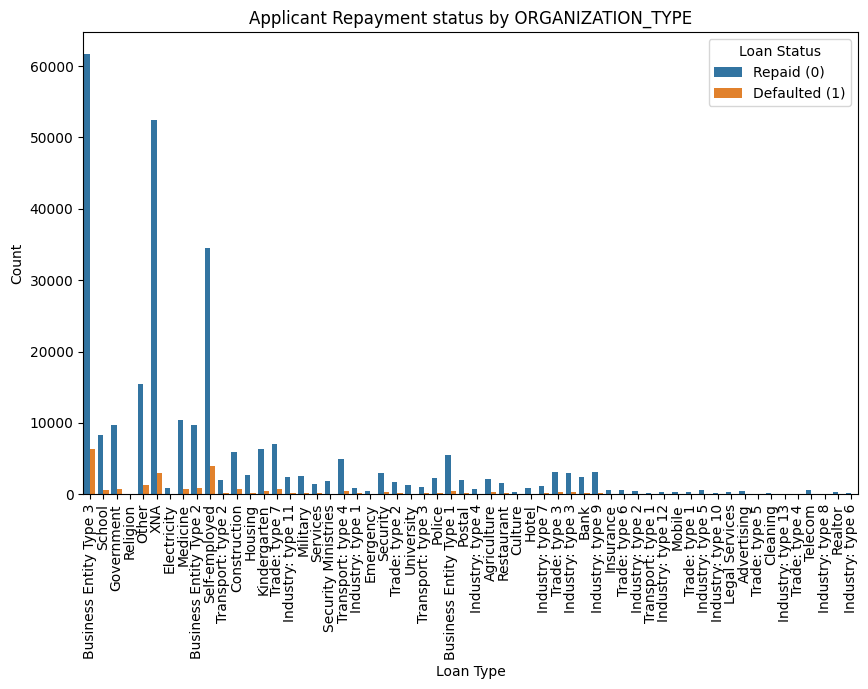

In [29]:
for category in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=category, hue='TARGET', data=loan_data)
    plt.title(f'Applicant Repayment status by {category}')
    plt.xlabel('Loan Type')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.legend(title='Loan Status', loc='upper right', labels=['Repaid (0)', 'Defaulted (1)'])
    plt.show()

#### Observations
- Highest represented applicant groups by category: homeowners, non-car owners, laborers, married status, identifies female, has secondary level education, and works with business entity organization type
- Important to note these are NOT correlations to default rate

In [30]:
cat_cols = pd.get_dummies(cat_cols, drop_first=True, prefix='encoded').astype(int)

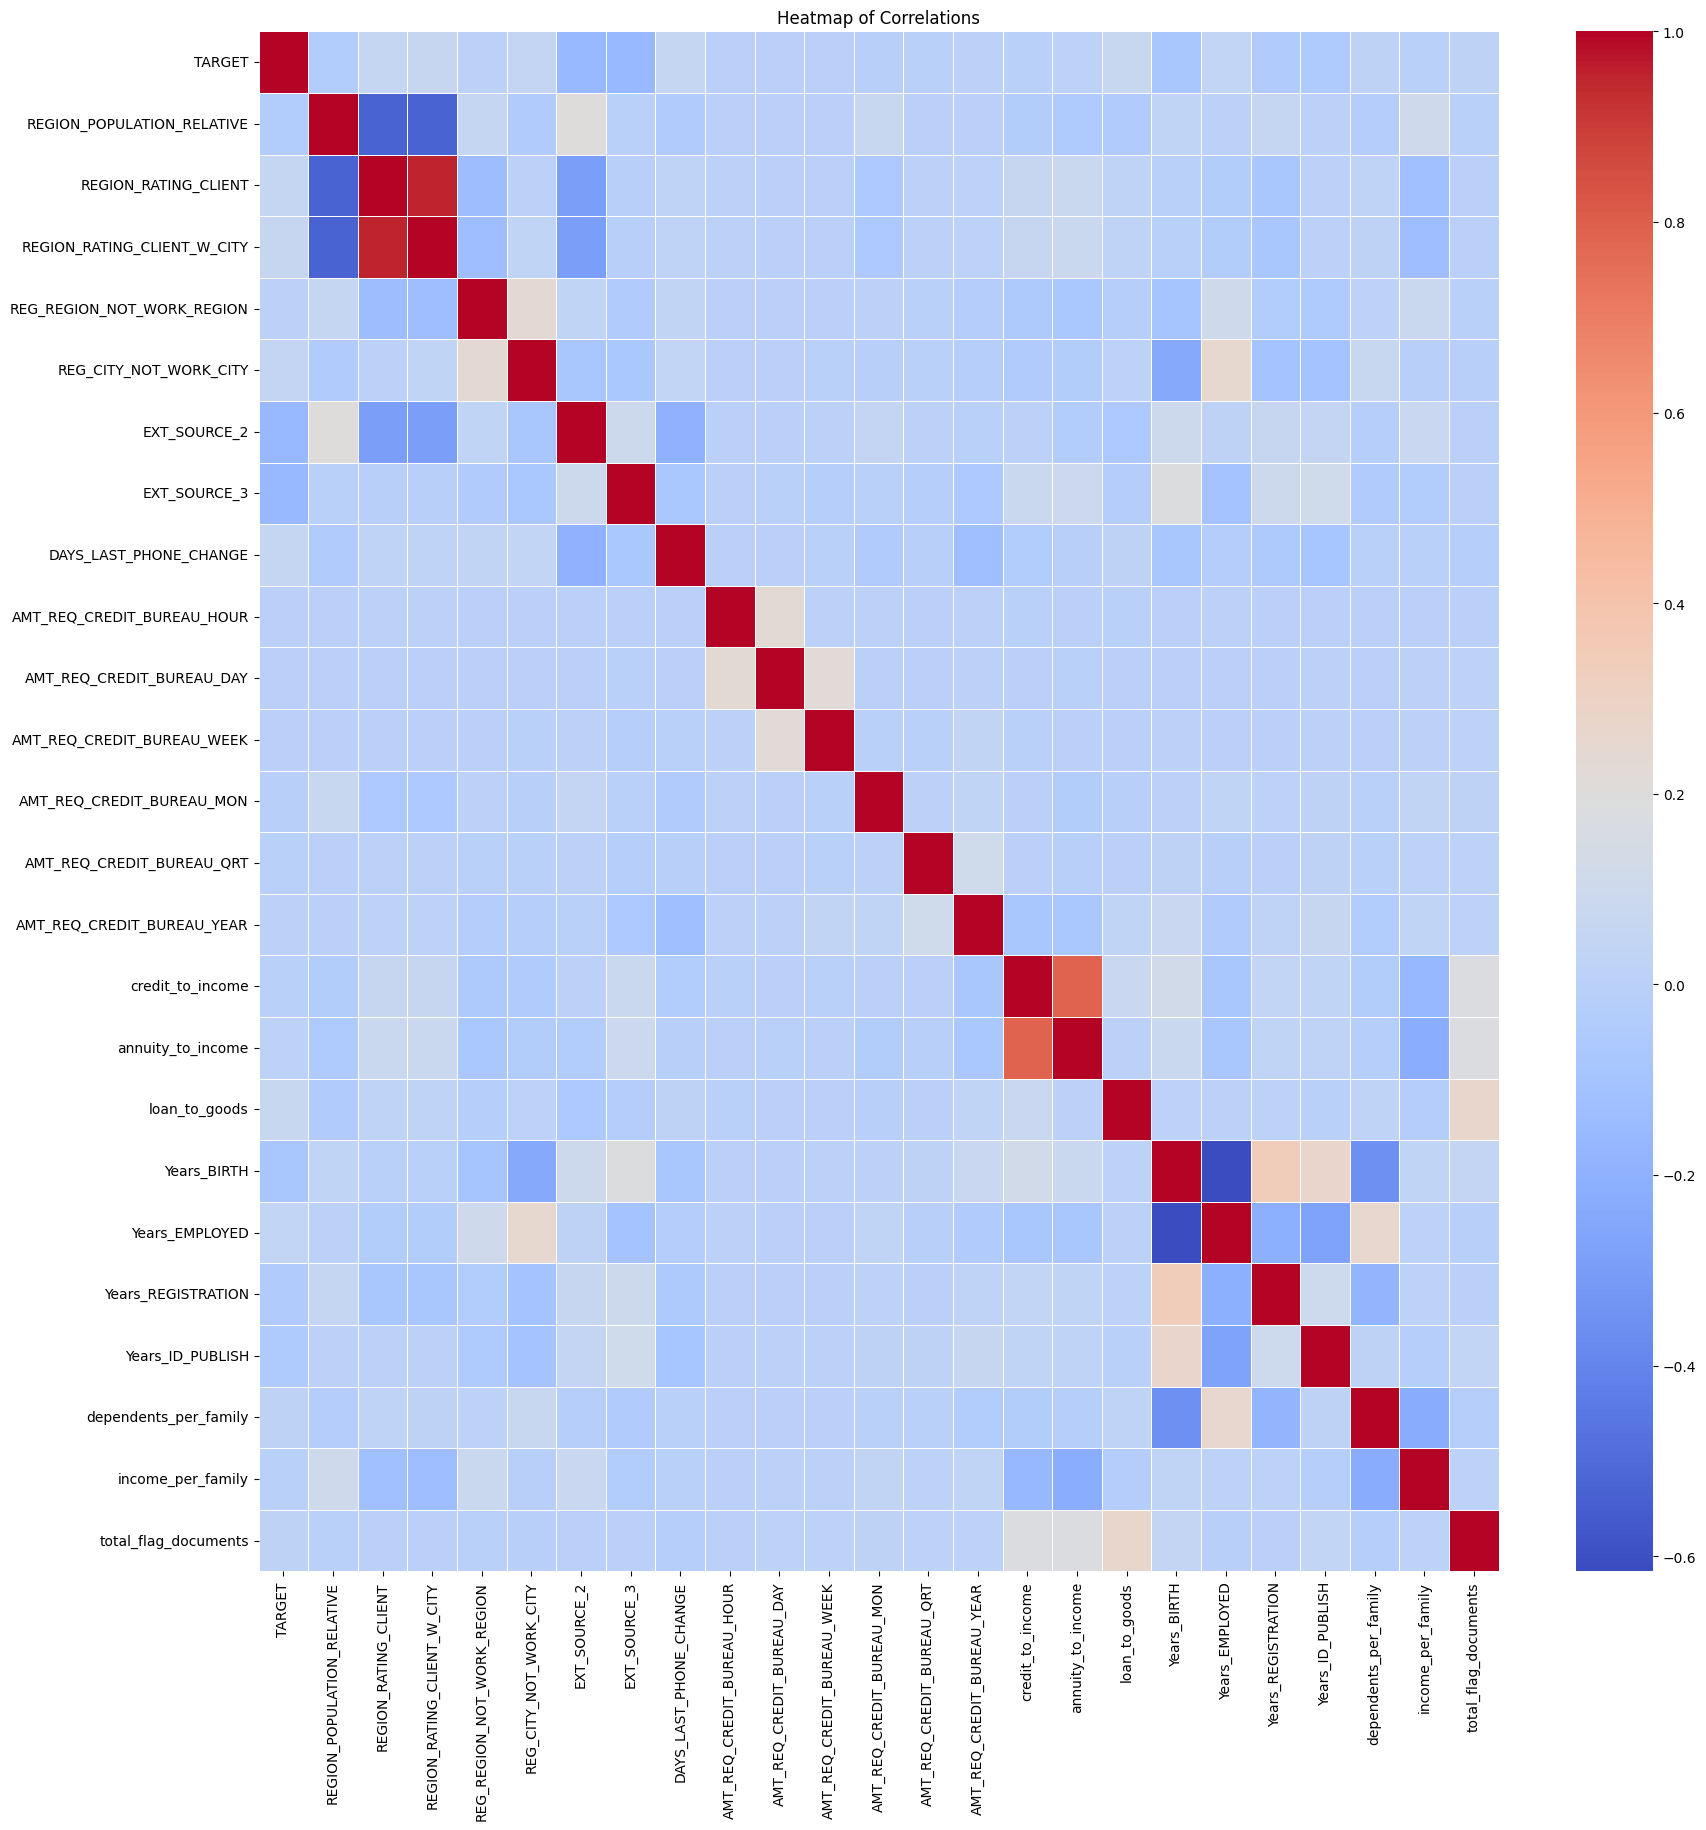

In [31]:
plt.figure(figsize=(20, 20))
sns.heatmap(num_cols.corr(), cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Correlations")
plt.show()

#### Observations
- There does not seem to be an clear direct correlations to target column as target column is a binary class that may not scale with continued increasing or decreasing feature values
    - However there are possible negative correlations to age and EXT_SOURCE data.
    - EXT_SOURCE_1 was dropped due to high null values
- Other correlations between features appear to only be related to regional, demographic, and financial situation information


In [32]:
loan_data = pd.concat([num_cols, cat_cols], axis=1)

### Print the percentage of default to a payer of the dataset for the TARGET column


In [33]:
X= loan_data.drop(['TARGET'], axis=1,)
y= loan_data['TARGET']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [35]:
print(X_train.shape)
print(y_train.shape)

(246008, 124)
(246008,)


### Balance the dataset if the data is imbalanced

In [36]:
target_percent = y.value_counts().reset_index()
default_percent = ((target_percent['count'][1])/len(y)) * 100 
print(f'Percentage of payer repaying loan is {default_percent:.2f}%')

Percentage of payer repaying loan is 8.07%


### Plot the balanced or imbalanced data

Total 124 columns to be considered after encoding categorical features for the model

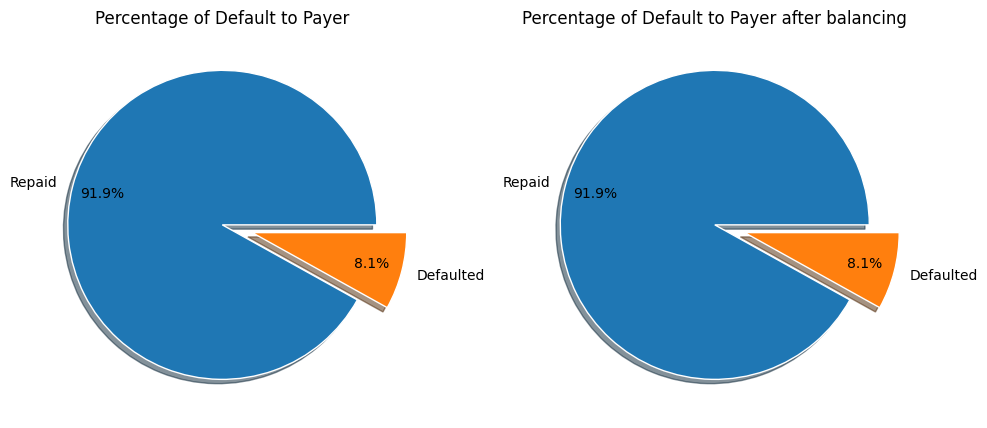

<Figure size 640x480 with 0 Axes>

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# First pie chart
axes[0].pie(y.value_counts(), labels=['Repaid','Defaulted'], shadow=True, explode=(0, 0.20), autopct='%1.1f%%', pctdistance=.8, wedgeprops={'edgecolor': 'white'})
axes[0].set_title('Percentage of Default to Payer')

# Second pie chart
axes[1].pie(y_train.value_counts(), labels=['Repaid','Defaulted'], shadow=True, explode=(0, 0.20), autopct='%1.1f%%', pctdistance=.8, wedgeprops={'edgecolor': 'white'})
axes[1].set_title('Percentage of Default to Payer after balancing')


plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

#### Observations:
- 8% of the applicants had defaulted
- After applying SMOTE sampler, dataset has been rebalanced to 50:50

In [38]:
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=X.columns)

In [40]:
print(X_train.shape)
print(y_train.shape)

(452296, 124)
(452296,)


### Building model

In [41]:
early_stop = EarlyStopping(
    monitor='val_loss',     # or 'val_auc', 'val_recall', etc.
    patience=3,             # number of epochs with no improvement before stopping
    restore_best_weights=True
)

learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_loss',
    patience=3,
    verbose=0,
    factor=0.5,
    min_lr=0.00001
)

model = Sequential([
    Dense(128,  input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.1)),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.1)),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])


# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy','Recall'])

# Fit the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1, validation_split=0.2, callbacks=[learning_rate_reduction, early_stop])

/var/data/python/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-05 08:12:55.721526: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/10
5654/5654 ━━━━━━━━━━━━━━━━━━━━ 6s 901us/step - Recall: 0.7386 - accuracy: 0.8796 - loss: 1.2824 - val_Recall: 0.9299 - val_accuracy: 0.9299 - val_loss: 0.2292 - learning_rate: 0.0010
Epoch 2/10
5654/5654 ━━━━━━━━━━━━━━━━━━━━ 5s 867us/step - Recall: 0.8028 - accuracy: 0.9090 - loss: 0.3258 - val_Recall: 0.9542 - val_accuracy: 0.9542 - val_loss: 0.1625 - learning_rate: 0.0010
Epoch 3/10
5654/5654 ━━━━━━━━━━━━━━━━━━━━ 5s 852us/step - Recall: 0.8041 - accuracy: 0.9108 - loss: 0.3065 - val_Recall: 0.9312 - val_accuracy: 0.9312 - val_loss: 0.1915 - learning_rate: 0.0010
Epoch 4/10
5654/5654 ━━━━━━━━━━━━━━━━━━━━ 5s 847us/step - Recall: 0.8051 - accuracy: 0.9117 - loss: 0.2962 - val_Recall: 0.9501 - val_accuracy: 0.9501 - val_loss: 0.1514 - learning_rate: 0.0010
Epoch 5/10
5654/5654 ━━━━━━━━━━━━━━━━━━━━ 5s 843us/step - Recall: 0.8030 - accuracy: 0.9119 - loss: 0.2933 - val_Recall: 0.9539 - val_accuracy: 0.9539 - val_loss: 0.1430 - learning_rate: 0.0010
Epoch 6/10
5654/5654 ━━━━━━━━━

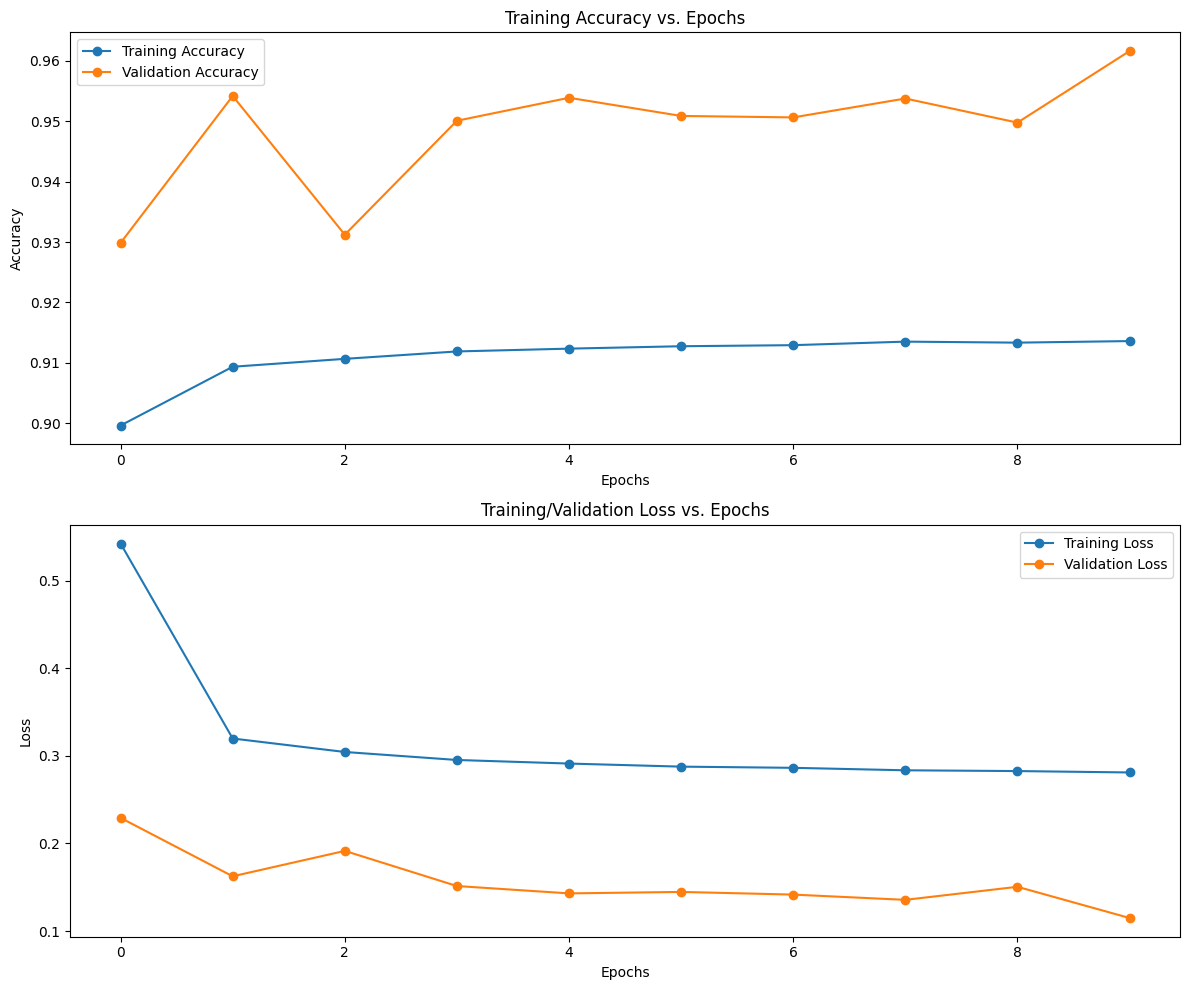

In [42]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Training Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Training Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

plt.tight_layout()
plt.show()

#### Observation
- Based on this graph, the model is overfitting as the validation accuracy is trending lower than the training accuracy 
    - Likewise, the validation loss is higher than the training loss

### Calculate sensitivity as a metric

In [43]:
predictions = model.predict(X_test)
y_pred = (predictions >= 0.5).astype(int)

1922/1922 ━━━━━━━━━━━━━━━━━━━━ 1s 311us/step


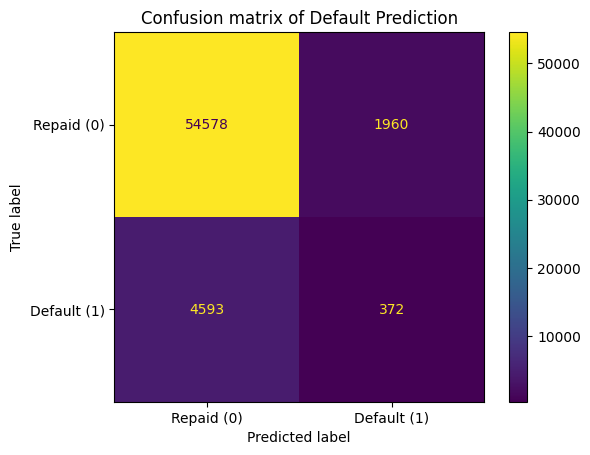

In [44]:
confu_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=confu_matrix, display_labels=['Repaid (0)', 'Default (1)'])
display.plot()
plt.title('Confusion matrix of Default Prediction')
plt.show()

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     56538
           1       0.16      0.07      0.10      4965

    accuracy                           0.89     61503
   macro avg       0.54      0.52      0.52     61503
weighted avg       0.86      0.89      0.88     61503



In [46]:
sensitivity = recall_score(y_test, y_pred)
print(f"Sensitivity: {sensitivity:.2f}")

Sensitivity: 0.07


In [47]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.89


In [48]:
f1 = f1_score(y_test, y_pred)
print(f"f1_score: {f1}")

f1_score: 0.10195970946964505


### Calculate the area under the receiver operating characteristics curve

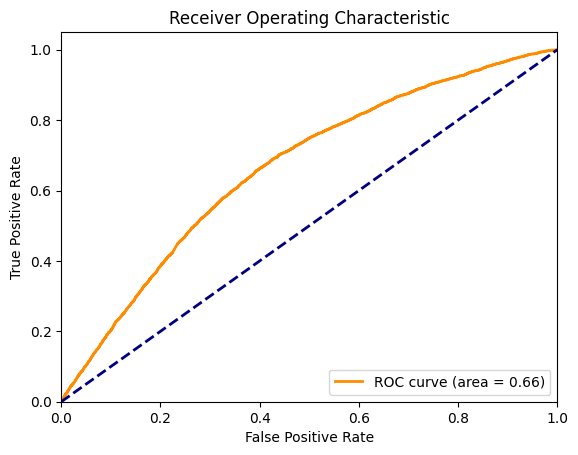

In [49]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


# Conclusion
- Current model is 89% accurate at predicting repayment
- However, sensitivity for current model was 7%, which is a poor model to be used to predicting defaulting loans.
- ROC curve shows that this model is barely better than a coin flip
- Significant amounts of data were dropped, due to missing values, which could have added to predictive factors for loan repayment
- Further feature engineering and data manipulation can be done as well as techniques to minimize overfitting of the model